# Introduction to Sampling 

## Introduction

Rarely, if ever, are we able to completely survey a population of interest. Similarly, we will often deal with missing data. Whatever it may be, whether estimating asthma rates, fish populations, daily temperatures, material volumes, risk, manufacturing defects or any other measurement of unknown or large scale quantities, we are unlikely to have complete information of the system in question. As a result, we do our best by taking samples and using these to estimate the corresponding measurements for the complete population, from which we took the sample. These estimates of population parameters are known as **point estimates**. Interestingly, point estimates of specific parameters of a population have predictable behaviors, in that the point estimates themselves will form specific probability distributions. For example, we may want to know information about the age of a population. One parameter we might want to estimate is the mean age of the population. Once we take a sample, we can take the mean age of that sample and that would become the point estimate for the mean age of the entire population. If we continue to take more samples from the population, the mean age of each of these samples will begin to form a normal distribution! This intriguing fact lets us apply some logic and calculate confidence intervals surrounding our point estimates so that we not only have a best guess for the parameter, but also can have a range to describe various levels of certainty for our estimates. Ideally, these ranges will be small, indicating that we have a high degree of confidence that the parameter is very close to our estimate.


## Objectives
You will be able to:
* Describe how samples are able to allow data scientists to gain insights to a population

Let's start by importing a dataset to use for demonstration. In this case, we'll use a datafile concerning individuals who were on board the Titanic. We'll use this as our entire population and start to observe how the point estimates from various samples of this population behave.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('titanic.csv')
print(len(df))
df.head()

891


,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


If we take a look at the population mean age we have:

In [2]:
df.Age.mean()

29.69911764705882

Let's see what happens when we take a sample in order to estimate this population parameter. (Again remember, this is called a point estimate!)

In [3]:
sample = df.sample(n=50, random_state=22) #Take a sample of 50 people
sample.Age.mean() #Calculate the sample mean

27.79268292682927

It's not a bad estimate, even though it's not exact. From here we can start to ask many questions related to how confident we are in this estimate. A first simple approach is to quantify our estimate. We'll first look at the percent error:

In [8]:
err = np.abs(sample.Age.mean() - df.Age.mean())
per_err = err / df.Age.mean()
print(per_err)

0.06419162827951391


As it stands, our estimate is close but about 6% off of the actual figure. We might start to wonder whether this is a *normal* or expected error for our sample to be off. Can we say that a sample of 50 from a population of roughly 900 will always produce a point estimate this accurate? To simulate this, let's repeat this process of taking a sample (let's stick with 50 people for now) and save all of these sample means and see what happens.

In [4]:
sample_means = []
for i in range(10**4):
    sample = df.sample(n=50, random_state=i) #Take a sample of 50 people
    sample_means.append(sample.Age.mean()) #Calculate the sample mean

The first thing we'll look at is the distribution of our sample means.

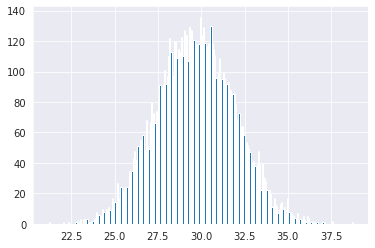

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid') #Pretty background including grid lines for our backdrop
plt.hist(sample_means, bins=250);

Interesting! The first thing to note here is that the sample means form a normal distribution! What's more, let's take a look at the mean of our sample means:

In [6]:
import numpy as np
np.mean(sample_means)

29.678139189972246

Wow! Look at that! The mean of our sample means is extremely close to the actual mean of the population! The mean of means of this simulation shows an accuracy of 99.9%

In [12]:
population_mean = df.Age.mean()
mean_sample_means = np.mean(sample_means)
acc = 1 - (np.abs(mean_sample_means - population_mean) / population_mean)
print(acc)

0.9992936336582157


## Summary


We've begun to investigate and think about how we can gain knowledge about a population using sampling techniques. From there, we further explored how the estimates provided by samples can themselves be analyzed as a mathematical distribution. These observations serve as the intuition behind confidence intervals. In future sections, we'll talk about point estimators (including parameters other than the mean such as standard deviation) and confidence intervals in more detail!